In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Insertion


In [26]:
df = pd.read_csv(r'C:\Users\91835\Downloads\Diwali Sales Data.csv', encoding='unicode_escape')
# To avoid any encoding errors while reading the CSV file use 'unicode_escape'

## Data Classification and Cleaning

In [27]:
df.shape

(11251, 15)

In [28]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [30]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [32]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [34]:
df.shape

(11251, 13)

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(11239, 13)

In [37]:
df['Amount'] = df['Amount'].astype('int')

In [38]:
df['Amount'].dtype

dtype('int64')

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Data Visualization

### Gender

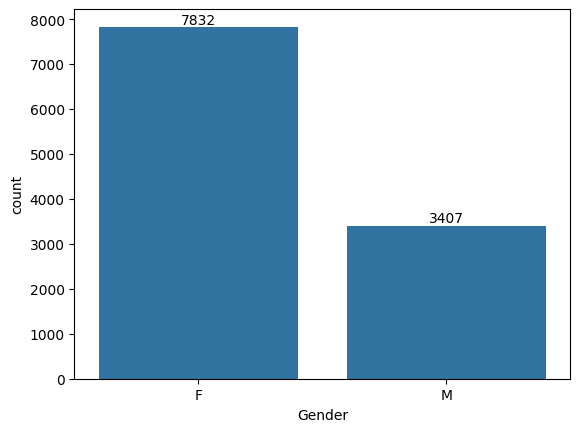

In [40]:
ax = sns.countplot(x='Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [41]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

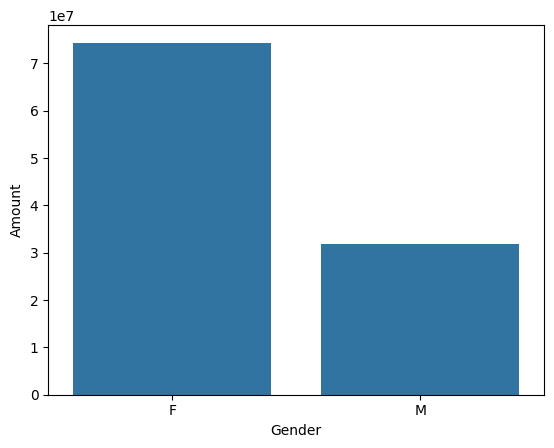

In [42]:
av = sns.barplot(x='Gender', y = 'Amount', data = sales_gen)



From the above chart we can see that most of the buyers are Females and even the purchasing power of females are grater than men

### Age Group

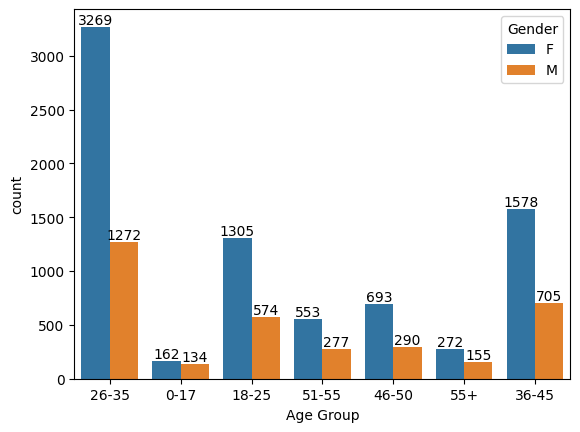

In [43]:
ab = sns.countplot(data= df, x='Age Group', hue='Gender')

for bar in ab.containers:
    ab.bar_label(bar)

In [44]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

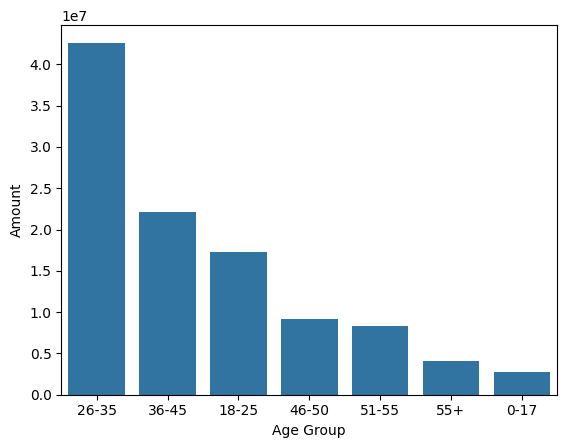

In [45]:
ab = sns.barplot(x = 'Age Group', y = 'Amount',data= sales_age)



From the above chart we can see that most of the buyers are of the age group between 26-35 years females

### State


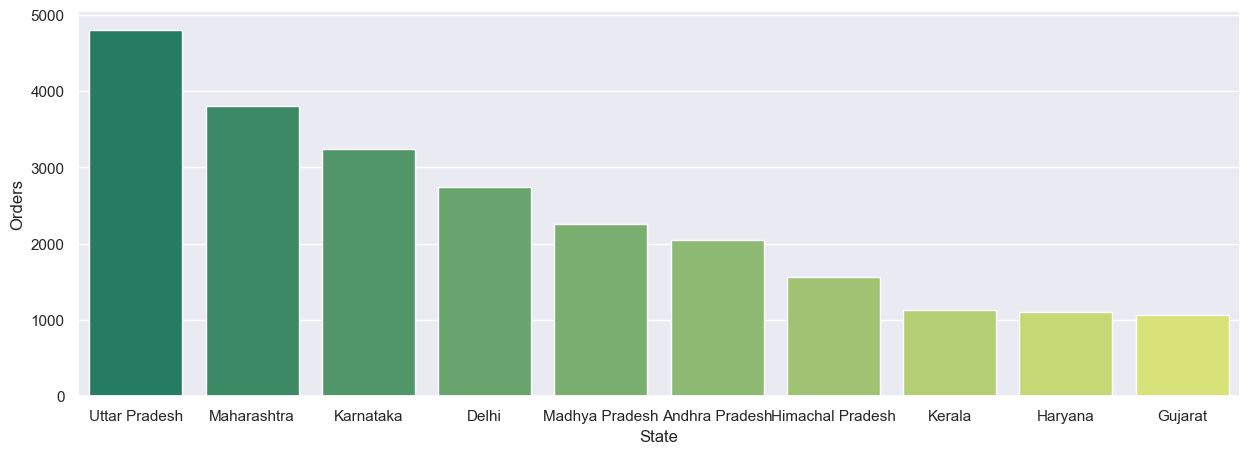

In [ ]:
order_states = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
aa = sns.barplot(x='State', y='Orders',hue='State', data=order_states, palette='summer')

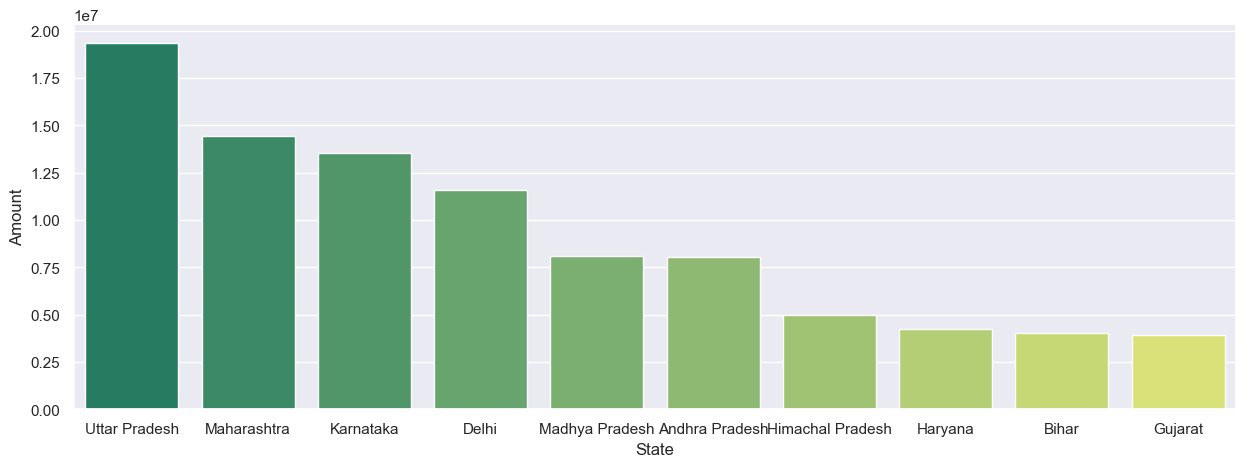

In [67]:
order_states = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
aa = sns.barplot(x='State', y='Amount',hue='State', data=order_states, palette='summer')

*From the above graphs we can see that  most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Matial Status

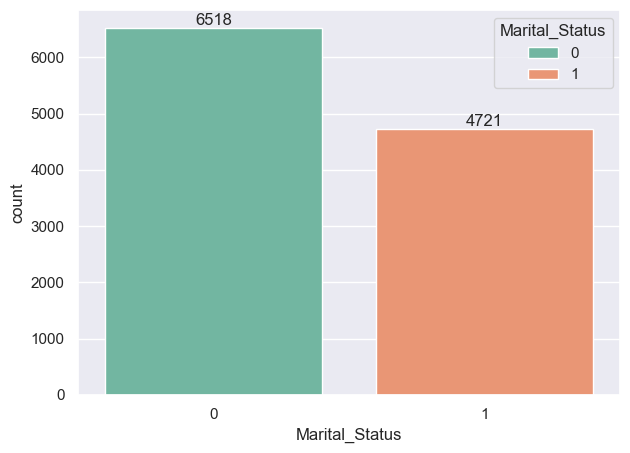

In [72]:
aq = sns.countplot(x='Marital_Status',hue='Marital_Status', data=df, palette='Set2')

sns.set(rc={'figure.figsize':(7,5)})
for bar in aq.containers:
    aq.bar_label(bar)

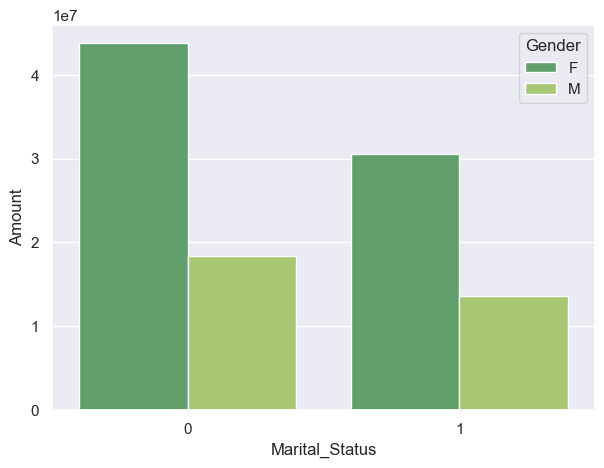

In [74]:
Martial_satus = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(7,5)})
aw = sns.barplot(x='Marital_Status',y='Amount',hue='Gender', data=Martial_satus, palette='summer')

*From the above graph we can see that  most of buyers are married(women) and they have  a high purchasing power*

### Occupation


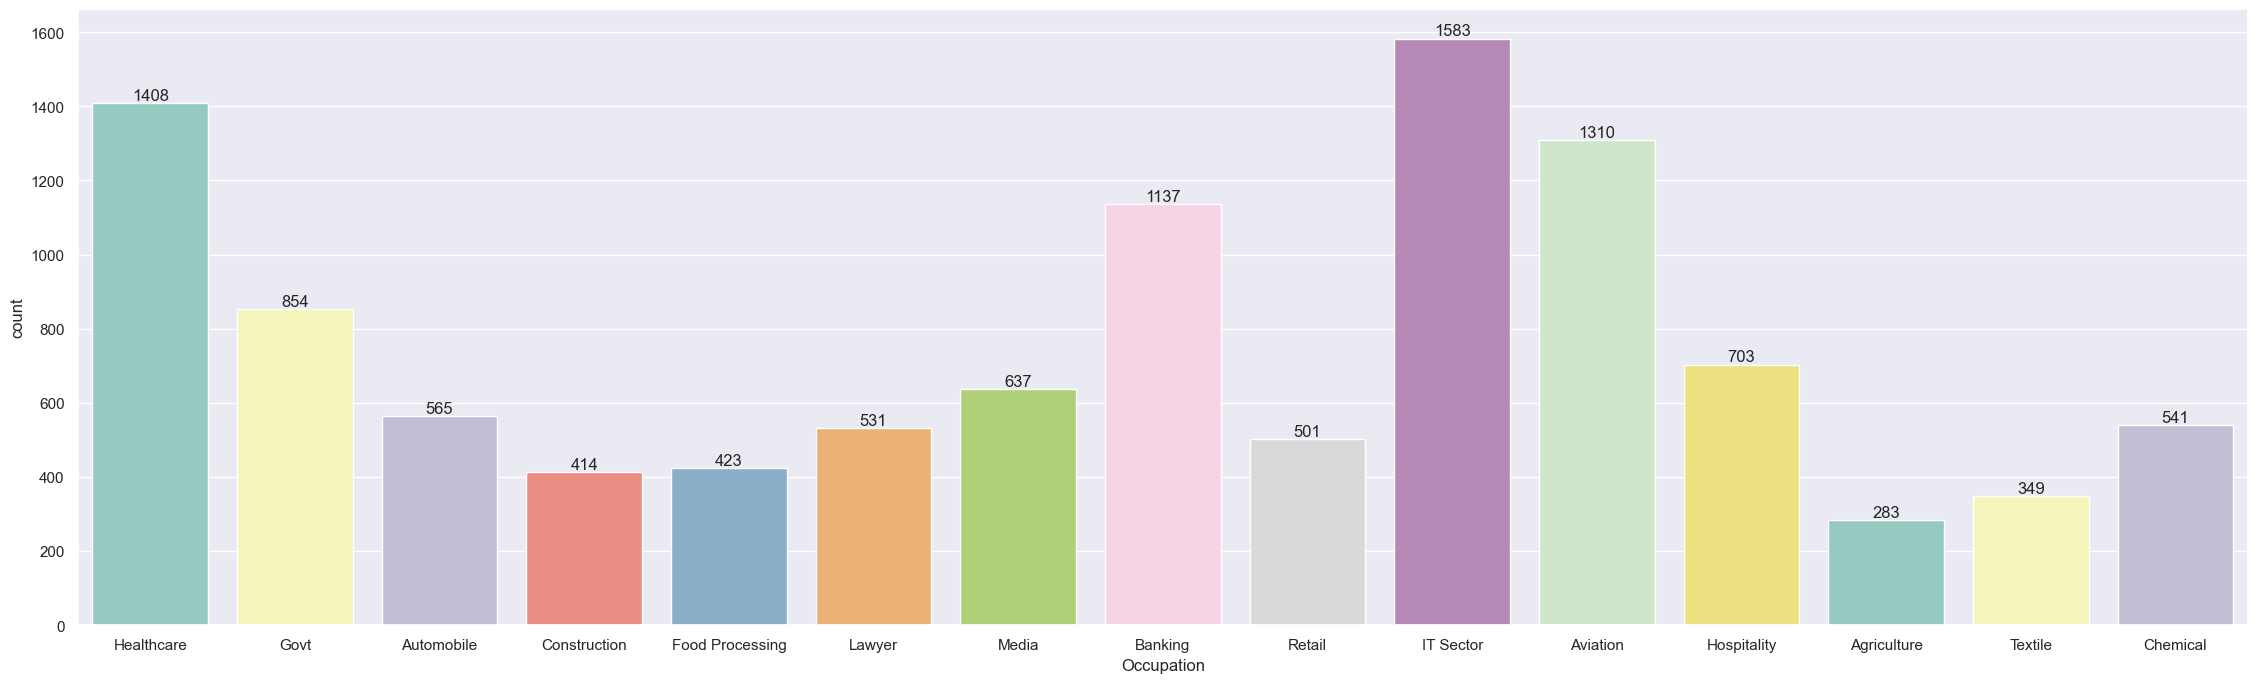

In [78]:
sns.set(rc={'figure.figsize':(28,8)})
az = sns.countplot(x='Occupation',hue='Occupation', data=df, palette='Set3')
for bar in az.containers:
    az.bar_label(bar)

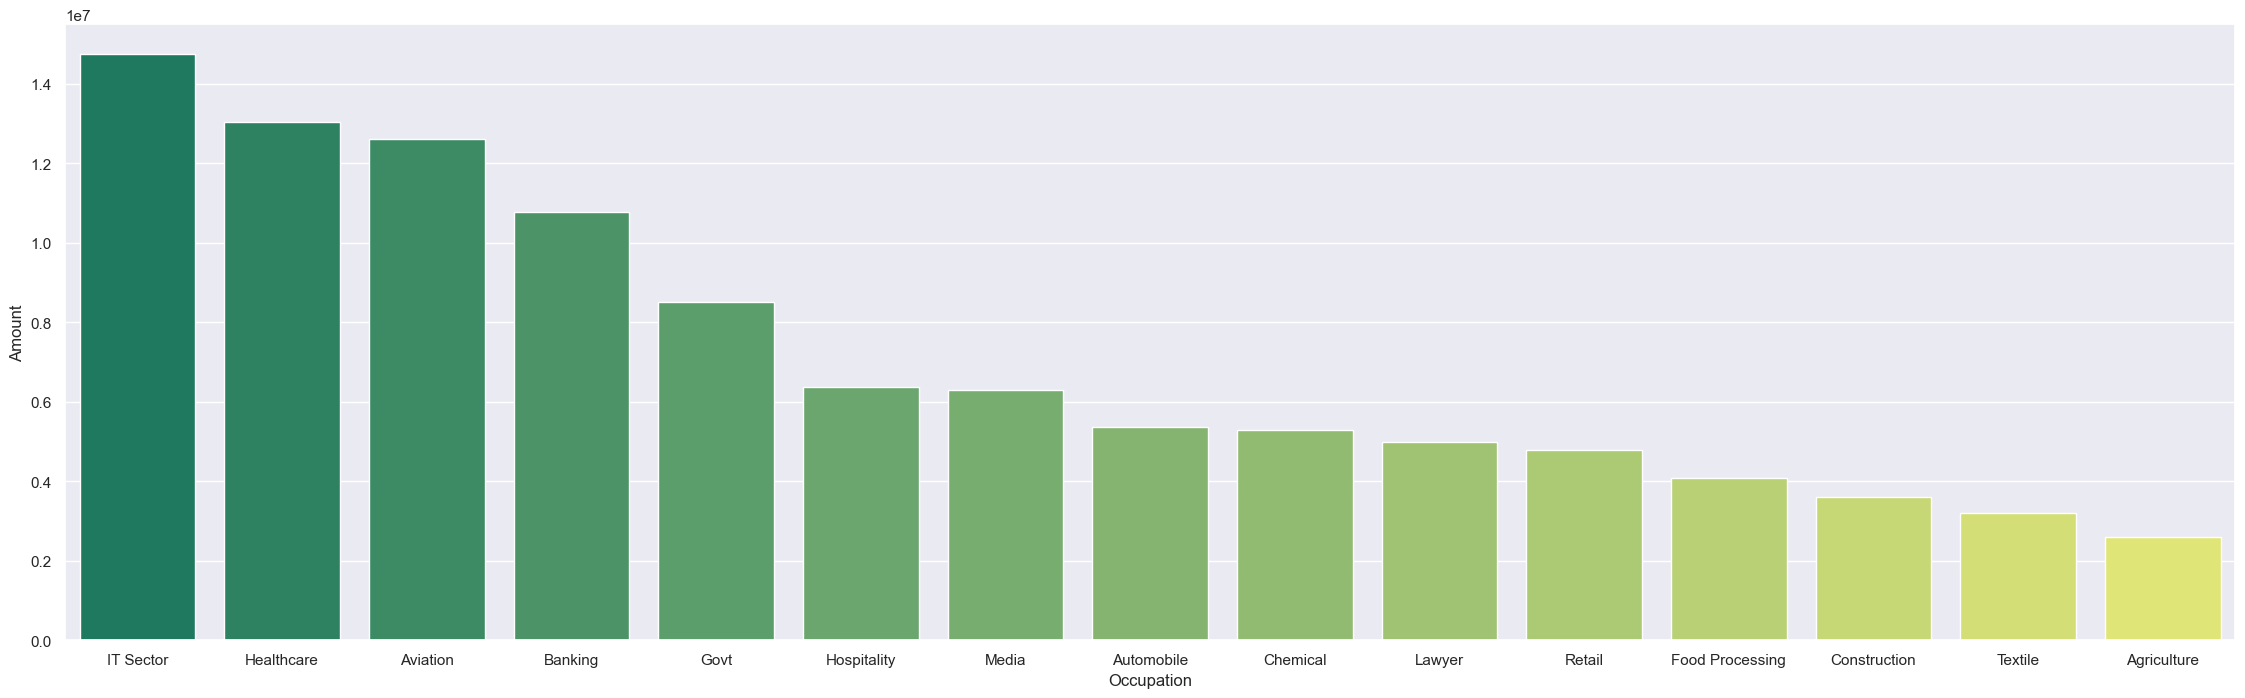

In [79]:
status =df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(28,8)})
am = sns.barplot(x='Occupation', y='Amount',hue='Occupation', data=status, palette='summer')

*From the above graphs we can see that most of the buyers are working at IT,Healthcare and Aviation sector*

### Product Category

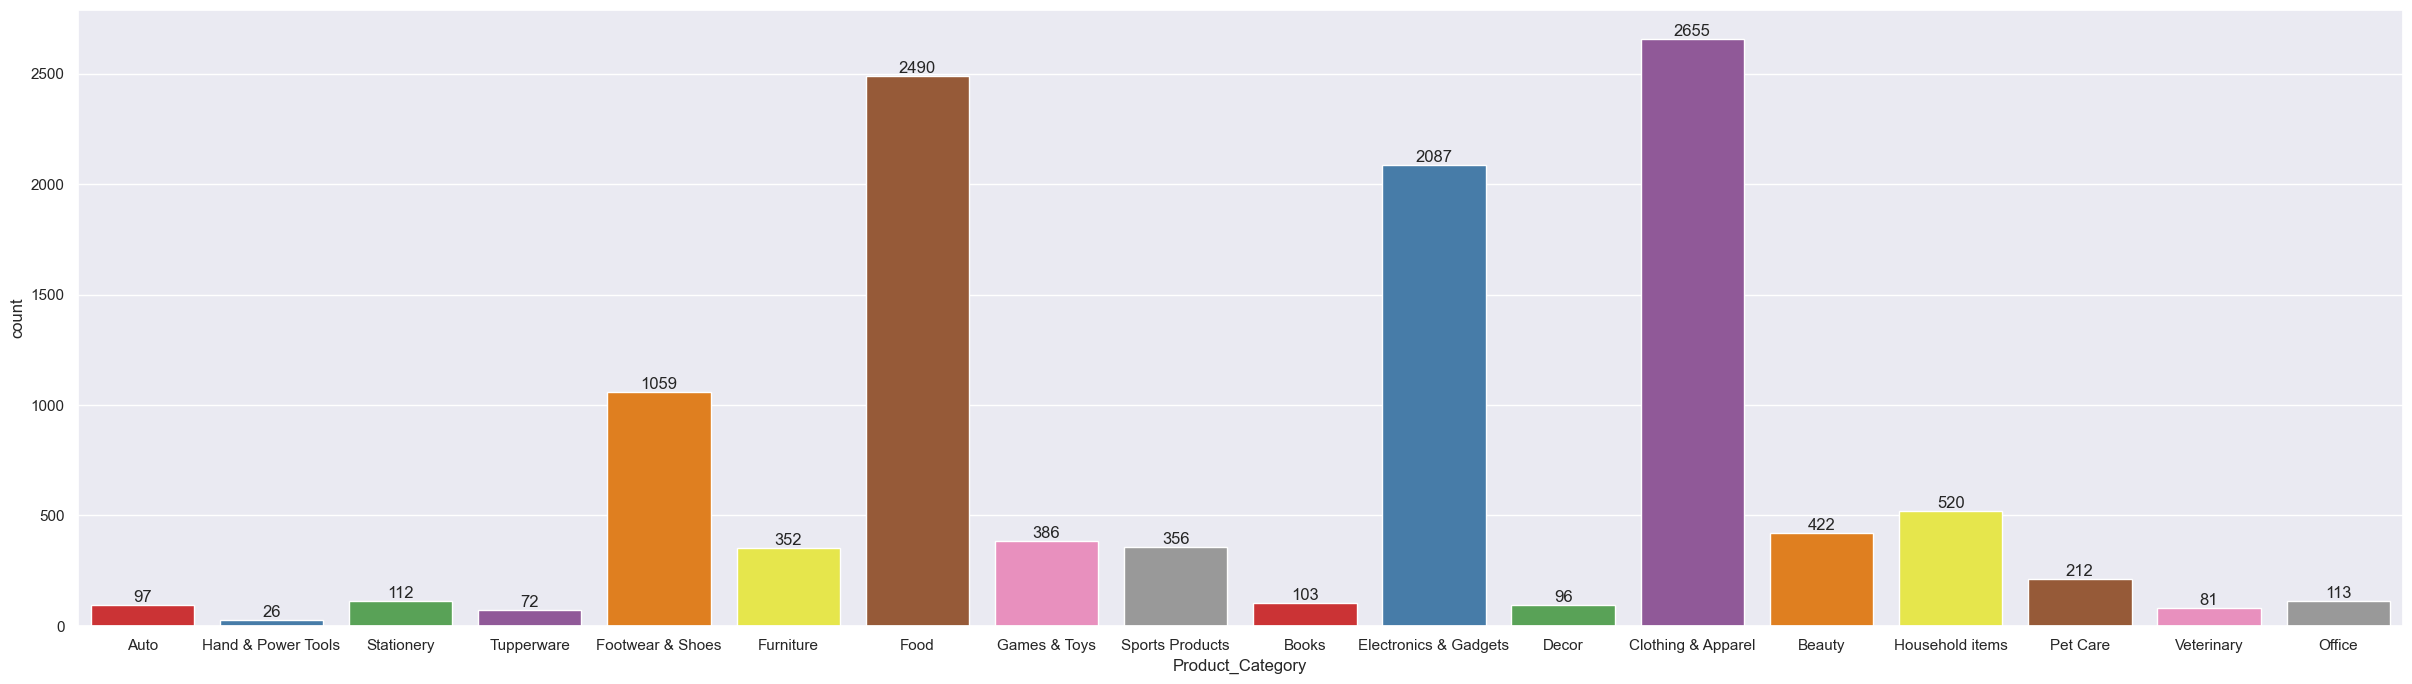

In [83]:
sns.set(rc={'figure.figsize':(30,8)})
ad = sns.countplot(x='Product_Category',hue='Product_Category', data=df, palette='Set1')

for bar in ad.containers:
    ad.bar_label(bar)

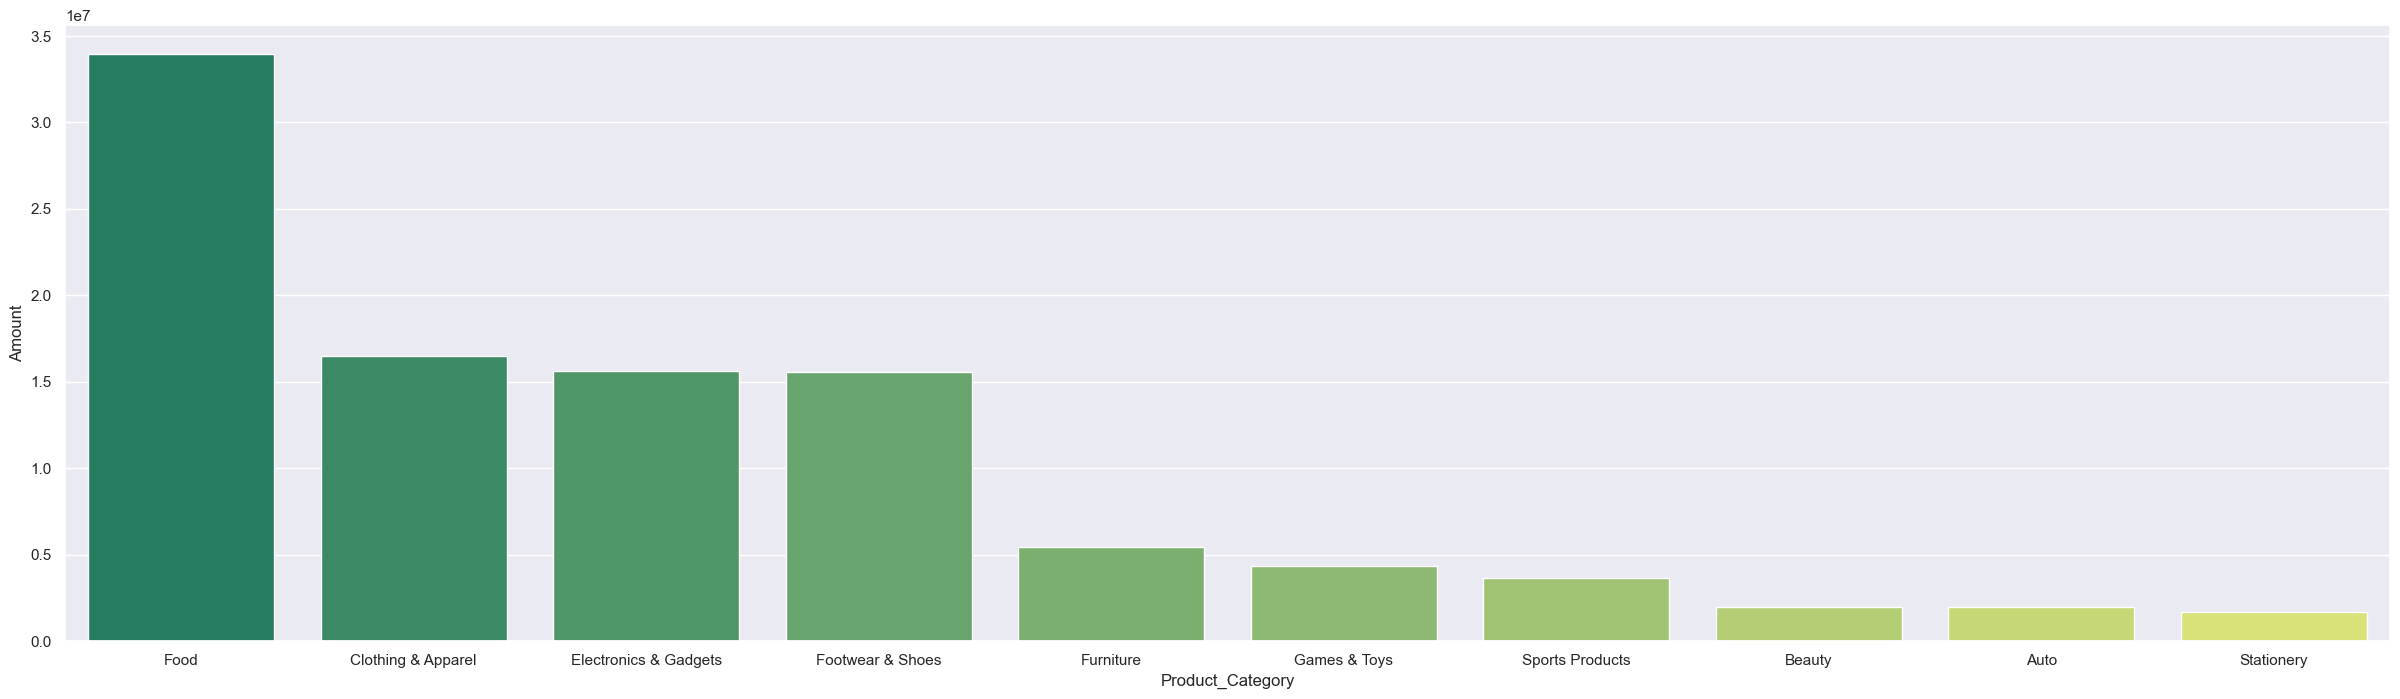

In [88]:
prodct_status = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,8)})
af = sns.barplot(x='Product_Category', y='Amount',hue='Product_Category', data=prodct_status, palette='summer')

*From the above graphs we can see that most of the sold products are from Food,Clothing and Electronics category*

### Conclusion



*Married women ahe group of 26-35 years from UP,Maharshatra,Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*